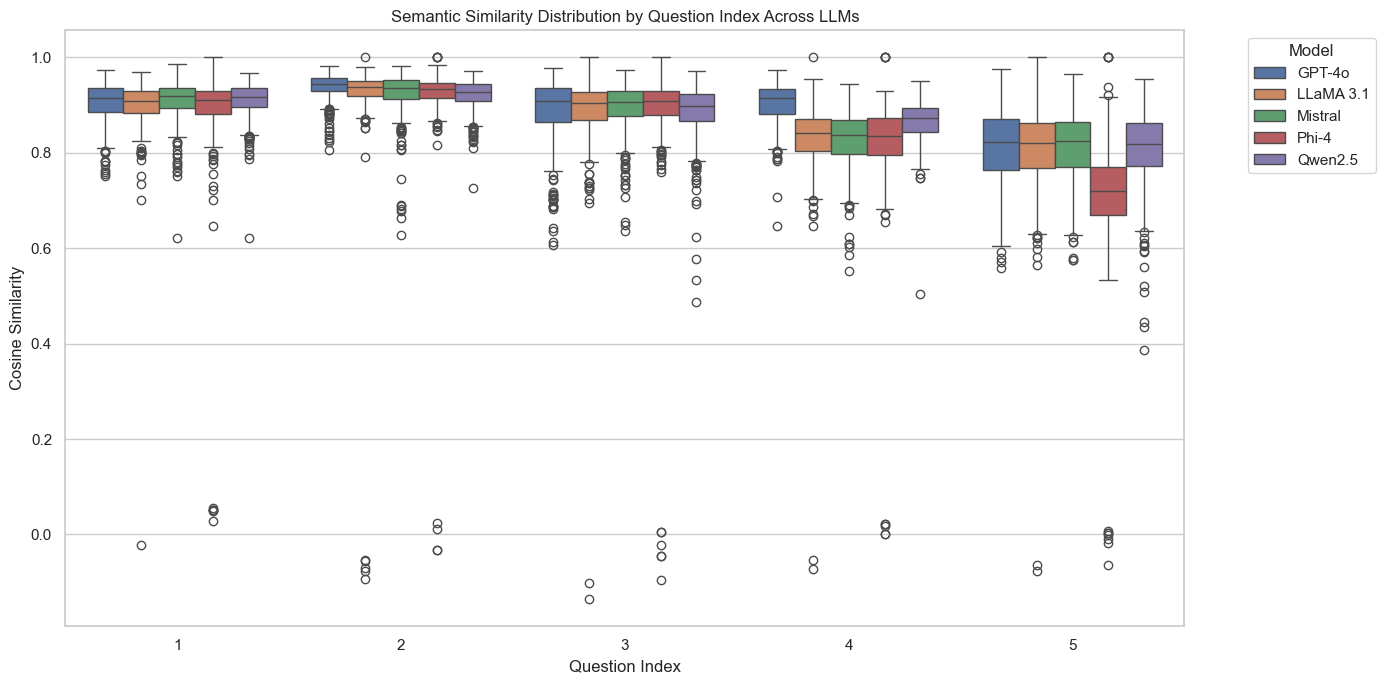

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Define model file paths
files = {
    "GPT-4o": "counterfactual_bias_analysis_gpt4o.csv",
    "LLaMA 3.1": "counterfactual_bias_analysis_llama3.1.csv",
    "Mistral": "counterfactual_bias_analysis_mistral.csv",
    "Phi-4": "counterfactual_bias_analysis_phi.csv",
    "Qwen2.5": "counterfactual_bias_analysis_qwen.csv"
}

# Load and combine data
df_list = []
for model_name, file_path in files.items():
    df = pd.read_csv(file_path)
    df["model"] = model_name
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# Plot: Similarity Distribution by Question Index
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df, x="question_index", y="similarity", hue="model")
plt.title("Semantic Similarity Distribution by Question Index Across LLMs")
plt.xlabel("Question Index")
plt.ylabel("Cosine Similarity")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("similarity_by_question_across_llms.pdf")
plt.show()
